In [1]:
# Importing the librarys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [7]:
# Load the Digit dataset
digits = load_digits()

# Split the dataset into training and test sets using a 70/30 split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

# Printing the shapes
print(f'dataset: {digits.data.shape}')
print('------------------')
print(f'x_train: {x_train.data.shape}')
print(f'y_train: {y_train.data.shape}')
print('------------------')
print(f'x_test: {x_test.data.shape}')
print(f'y_test: {y_test.data.shape}')

dataset: (1797, 64)
------------------
x_train: (1257, 64)
y_train: (1257,)
------------------
x_test: (540, 64)
y_test: (540,)


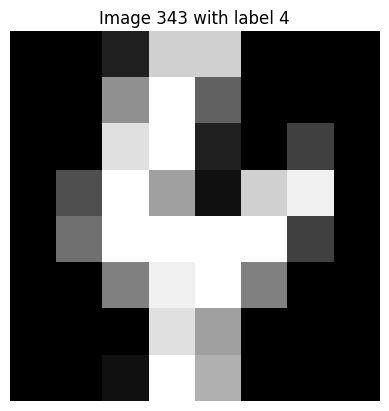

In [8]:
# Dispaly one Random image
# Choose a random image index
idx = np.random.randint(0, len(digits.images))

# Display the image
plt.imshow(digits.images[idx], cmap='gray')
plt.title(f"Image {idx} with label {digits.target[idx]}")
plt.axis('off')
plt.show()

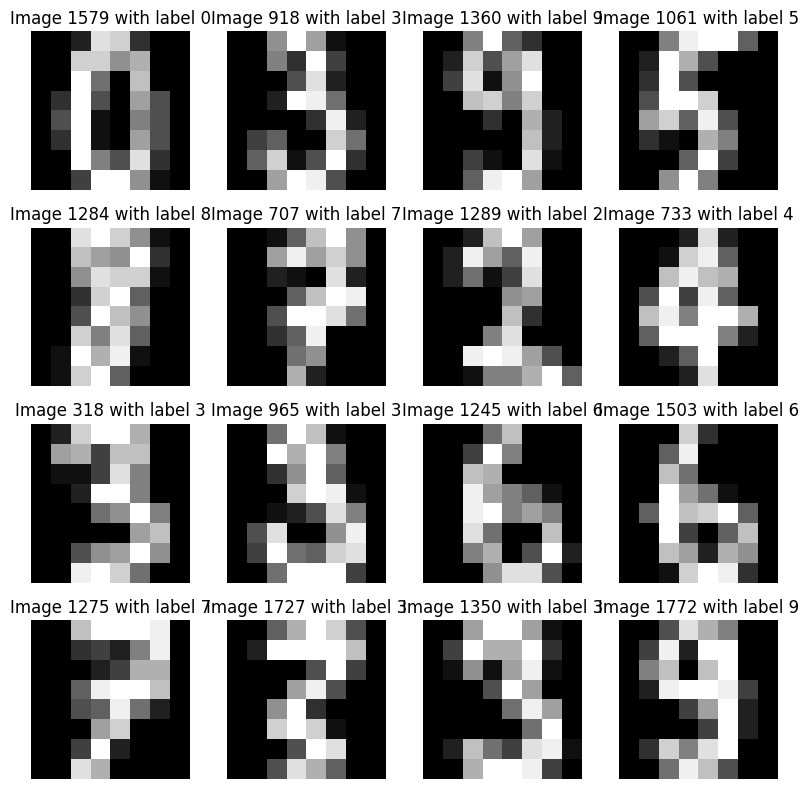

In [9]:
# Display 16 random images
# Choose 16 random image indices
idxs = np.random.randint(0, len(digits.images), size=16)

# Display the images in a 4x4 grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
for ax, idx in zip(axes.ravel(), idxs):
    ax.imshow(digits.images[idx], cmap='gray')
    ax.set_title(f"Image {idx} with label {digits.target[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [21]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform both the training and test data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Printing 2 samples
print('x_train[8]: \n'+str(x_train[8]))
print('-----------------------------------------------------')
print('x_test[8]: \n'+str(x_test[8]))

x_train[8]: 
[0.         0.         0.875      0.75       0.75       0.8125
 0.1875     0.         0.         0.         1.         0.5
 0.5        0.375      0.0625     0.         0.         0.
 0.875      0.4375     0.3125     0.         0.         0.
 0.         0.         0.9375     0.9375     1.         0.125
 0.         0.         0.         0.         0.8125     0.1875
 0.375      0.5        0.         0.         0.         0.
 0.         0.         0.1875     0.8125     0.         0.
 0.         0.         0.3125     0.25       0.5        0.75
 0.0625     0.         0.         0.14285714 0.9375     0.9375
 0.6875     0.1875     0.         0.        ]
-----------------------------------------------------
x_test[8]: 
[0.         0.125      0.75       1.         1.         1.
 0.25       0.         0.         0.25       1.         0.625
 0.25       0.0625     0.0625     0.         0.         0.375
 0.8125     0.         0.         0.         0.         0.
 0.         0.4        1.

In [28]:
# Create an instance of KNeighborsClassifier with K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(x_train, y_train)

# Use the trained classifier to make predictions on the test data
y_pred = knn.predict(x_test)

# Evaluate the performance of the classifier on the test set using classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.98      0.98      0.98        66
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       0.98      0.95      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [29]:
# Create an instance of KNeighborsClassifier with K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score to perform 10-fold cross-validation (cv=10) and compute the metrics
scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')

# Print the average and standard deviation of the scores for each metric
print(f"Average accuracy: {scores.mean():.3f} (std: {scores.std():.3f})")

scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='precision_macro')
print(f"Average precision: {scores.mean():.3f} (std: {scores.std():.3f})")

scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='recall_macro')
print(f"Average recall: {scores.mean():.3f} (std: {scores.std():.3f})")

scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='f1_macro')
print(f"Average F1-score: {scores.mean():.3f} (std: {scores.std():.3f})")

Average accuracy: 0.983 (std: 0.011)
Average precision: 0.985 (std: 0.010)
Average recall: 0.983 (std: 0.011)
Average F1-score: 0.983 (std: 0.011)


In [24]:
# Define a list of possible values of K
k_values = list(range(1, 31))

# Initialize an empty list to store the cross-validation scores
cv_scores = []

# Loop over the possible values of K and compute the cross-validation score for each
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

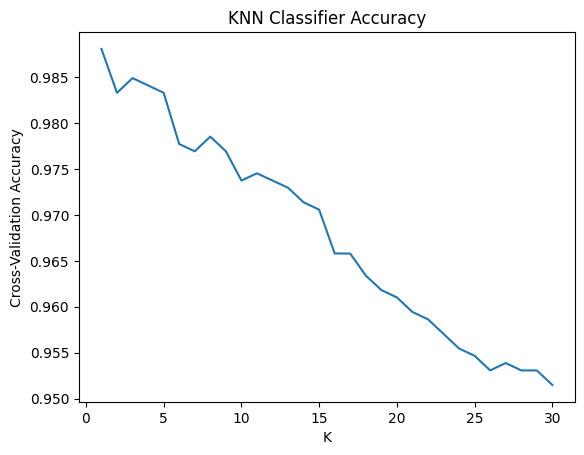

In [25]:
# Plot the cross-validation scores as a function of K
plt.plot(k_values, cv_scores)
plt.xlabel('K')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Classifier Accuracy')
plt.show()